# 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

## (a) Fit a logistic regression model that uses income and balance to predict default.

In [1]:
library(ISLR)
attach(Default)
set.seed(1)
fit.glm = glm(default~ income + balance, data=Default,family="binomial")
summary(fit.glm)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


## (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
   - i. Split the sample set into a training set and a validation set.
   - ii. Fit a multiple logistic regression model using only the train- ing observations.
   - iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
   - iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [2]:
# i. Split the sample set into a training set and a validation set.
library(caTools)
set.seed(123)
split=sample.split(Default$default,SplitRatio=0.8)
train = subset(Default,split==TRUE)
test = subset(Default,split==FALSE)

In [3]:
dim(train)
dim(test)

[1] 8000    4

[1] 2000    4

In [4]:
# ii. Fit a multiple logistic regression model using only the train- ing observations.
fit.glm = glm(default ~ income + balance, data=train, family="binomial")
summary(fit.glm)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4633  -0.1453  -0.0574  -0.0211   3.7219  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.151e+01  4.876e-01 -23.604  < 2e-16 ***
income       2.045e-05  5.651e-06   3.618 0.000297 ***
balance      5.631e-03  2.538e-04  22.190  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2333.8  on 7999  degrees of freedom
Residual deviance: 1268.6  on 7997  degrees of freedom
AIC: 1274.6

Number of Fisher Scoring iterations: 8


In [5]:
# iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior 
# probability of default for that individual, and classifying the individual to the default category if the posterior 
# probability is greater than 0.5.
probs = predict(fit.glm,test,type="response")
pred.glm = rep("No",length(probs))
pred.glm[probs>0.5] = "Yes"

In [6]:
# iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
mean(pred.glm != test$default)

[1] 0.023

### We have 2.3% test error rate.

## (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.

In [7]:


#1.
library(caTools)
set.seed(124)
split=sample.split(Default$default,SplitRatio=0.8)
train = subset(Default,split==TRUE)
test = subset(Default,split==FALSE)
fit.glm = glm(default ~ income + balance, data=train, family="binomial")
probs = predict(fit.glm,test,type="response")
pred.glm = rep("No",length(probs))
pred.glm[probs>0.5] = "Yes"
mean(pred.glm != test$default)

#2.
library(caTools)
set.seed(125)
split=sample.split(Default$default,SplitRatio=0.8)
train = subset(Default,split==TRUE)
test = subset(Default,split==FALSE)
fit.glm = glm(default ~ income + balance, data=train, family="binomial")
probs = predict(fit.glm,test,type="response")
pred.glm = rep("No",length(probs))
pred.glm[probs>0.5] = "Yes"
mean(pred.glm != test$default)

#3.
#2.
library(caTools)
set.seed(126)
split=sample.split(Default$default,SplitRatio=0.8)
train = subset(Default,split==TRUE)
test = subset(Default,split==FALSE)
fit.glm = glm(default ~ income + balance, data=train, family="binomial")
probs = predict(fit.glm,test,type="response")
pred.glm = rep("No",length(probs))
pred.glm[probs>0.5] = "Yes"
mean(pred.glm != test$default)

[1] 0.027

[1] 0.024

[1] 0.029

## (d) Now consider a logistic regression model that predicts the prob- ability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the val- idation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [8]:
fit.glm = glm(default ~ income + balance + student, data=train, family="binomial")
probs = predict(fit.glm,test,type="response")
pred.glm = rep("No",length(probs))
pred.glm[probs>0.5] = "Yes"
mean(pred.glm != test$default)

[1] 0.029

## Adding Student dummy isn't making any change. let's see its p-value

In [9]:
summary(fit.glm)


Call:
glm(formula = default ~ income + balance + student, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4806  -0.1355  -0.0509  -0.0180   3.7180  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.095e+01  5.567e-01 -19.675  < 2e-16 ***
income      -2.557e-06  9.194e-06  -0.278  0.78090    
balance      5.901e-03  2.686e-04  21.969  < 2e-16 ***
studentYes  -7.650e-01  2.655e-01  -2.882  0.00395 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2333.8  on 7999  degrees of freedom
Residual deviance: 1221.9  on 7996  degrees of freedom
AIC: 1229.9

Number of Fisher Scoring iterations: 8


## Income isn't a showing considerable p-value after including students. Let's try without income.

In [10]:
fit.glm = glm(default ~ balance + student, data=train, family="binomial")
probs = predict(fit.glm,test,type="response")
pred.glm = rep("No",length(probs))
pred.glm[probs>0.5] = "Yes"
mean(pred.glm != test$default)

[1] 0.029

# 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression co- efficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

- (a) Using the summary() and glm() functions, determine the esti- mated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.
- (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.
- (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.
- (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

In [11]:
# a)
fit.glm = glm(default ~ income + balance, data=train, family="binomial")
summary(fit.glm)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4804  -0.1378  -0.0529  -0.0189   3.7664  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.171e+01  4.994e-01 -23.451   <2e-16 ***
income       1.833e-05  5.616e-06   3.264   0.0011 ** 
balance      5.779e-03  2.617e-04  22.081   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2333.8  on 7999  degrees of freedom
Residual deviance: 1230.1  on 7997  degrees of freedom
AIC: 1236.1

Number of Fisher Scoring iterations: 8


## The glm() estimates of the standard errors for the coefficient b0,b1,b2 are respectively 0.4,0.0000056,0.00026.

In [12]:
# b)
boot.fn = function(data,train){
    fit = glm(default~income + balance,data=data,family="binomial",subset=train)
    return(coef(fit))
}

In [13]:
#c)
library(boot)
boot(Default,boot.fn,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -2.710923e-02 4.465869e-01
t2*  2.080898e-05 -1.542986e-07 4.849621e-06
t3*  5.647103e-03  1.635567e-05 2.301711e-04

# The bootstrap estimates of the standard error for the coefficients b0,b1 and b2 are 4.174525e-01, 4.864324e-06,  2.149903e-04.

In [14]:
# d)
# The estimated standard errors are pretty close.

# 7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alterna- tively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this ap- proach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).
- (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.
- (b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.
- (c) Use the model from (b) to predict the direction of the first obser- vation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this ob- servation correctly classified?
- (d) Writeaforloopfromi=1toi=n,wherenisthenumberof observations in the data set, that performs each of the following steps:
   - i. Fit a logistic regression model using all but the ith obser- vation to predict Direction using Lag1 and Lag2.
   - ii. Compute the posterior probability of the market moving up for the ith observation.
   - iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
   - iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.
- (e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [15]:
# a)
set.seed(1)
attach(Weekly)
fit.glm = glm(Direction~Lag1+Lag2,data=Weekly,family="binomial")
summary(fit.glm)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


In [16]:
#b)
fit.glm.1 = glm(Direction~Lag1+Lag2,data=Weekly[-1,],family="binomial")
summary(fit.glm.1)



Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly[-1, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


In [17]:
#c)
predict.glm(fit.glm.1,Weekly[1,],type="response") > 0.5

1 
TRUE

In [18]:
head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


# Not Predicted Correctly

In [19]:
#d)
set.seed(123)
error = rep(0,dim(Weekly)[1])
for(i in 1:dim(Weekly)[1]){
    fit.glm=glm(Direction~Lag1+Lag2,data=Weekly[-i,],family="binomial")
    pred.up=predict.glm(fit.glm,Weekly[i,],type="response") > 0.5
    true.up = Weekly[i,]$Direction == "UP"
    if (pred.up != true.up)
        error[i] = 1 
}
error

[1] 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
  [38] 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 [408] 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 [482] 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 [593] 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 [630] 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 [667] 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [704] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 [926] 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
[1000] 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [20]:
mean(error)

[1] 0.9320478

# 8. We will now perform cross-validation on a simulated data set.
## (a) Generate a simulated data set as follows:
> set.seed(1)
> x=rnorm(100)
> y=x-2*x^2+rnorm(100)
## In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [21]:
set.seed(1)
x = rnorm(100)
y = rnorm(100)
y=x-2*x^2+rnorm(100)

## (b) Create a scatterplot of X against Y . Comment on what you find.

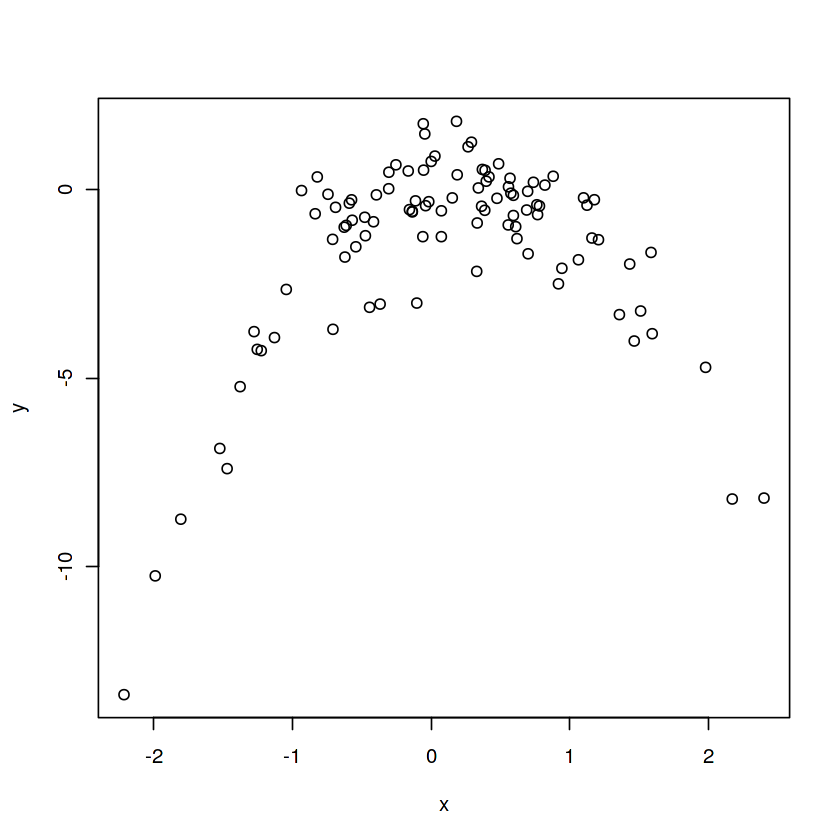

In [22]:
plot(x,y)

# Non linear or hyperbolic relationship.

## (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
- i. Y = β0 + β1X + ε
- ii. Y = β0 + β1X + β2X2 + ε
- iii. Y = β0 +β1X +β2X2 +β3X3 +ε
- iv. Y = β0 +β1X +β2X2 +β3X3 +β4X4 +ε.
### Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [23]:
library(boot)
set.seed(1)
Data = data.frame(x,y)
fit.glm.1 = glm(y~x)
cv.glm(Data,fit.glm.1)$delta[1]

[1] 6.923056

In [24]:
fit.glm.2 = glm(y~poly(x,2))
cv.glm(Data,fit.glm.2)$delta[1]

[1] 1.128194

In [25]:
fit.glm.3 = glm(y~poly(x,3))
cv.glm(Data,fit.glm.3)$delta[1]

[1] 1.084727

In [26]:
fit.glm.4 = glm(y~poly(x,4))
cv.glm(Data,fit.glm.4)$delta[1]

[1] 1.097829

## (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [27]:
library(boot)
set.seed(20)
Data = data.frame(x,y)
fit.glm.1 = glm(y~x)
cv.glm(Data,fit.glm.1)$delta[1]

[1] 6.923056

In [28]:
fit.glm.2 = glm(y~poly(x,2))
cv.glm(Data,fit.glm.2)$delta[1]

[1] 1.128194

In [29]:
fit.glm.3 = glm(y~poly(x,3))
cv.glm(Data,fit.glm.3)$delta[1]

[1] 1.084727

In [30]:
fit.glm.4 = glm(y~poly(x,4))
cv.glm(Data,fit.glm.4)$delta[1]

[1] 1.097829

## All results are close to each other because LOOCV evaluates n folds of a single observation.

## (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

cv.glm.2 is having the lowest LOOCV error as X and y shows a quadratic relationship between them.

## (f) Comment on the statistical significance of the coefficient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [31]:
summary(fit.glm.4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9153  -0.5277   0.1137   0.6562   2.3045  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4825     0.1023 -14.489  < 2e-16 ***
poly(x, 4)1   6.3875     1.0232   6.242  1.2e-08 ***
poly(x, 4)2 -22.8002     1.0232 -22.282  < 2e-16 ***
poly(x, 4)3   2.1839     1.0232   2.134   0.0354 *  
poly(x, 4)4  -1.2613     1.0232  -1.233   0.2207    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.047015)

    Null deviance: 666.475  on 99  degrees of freedom
Residual deviance:  99.466  on 95  degrees of freedom
AIC: 295.25

Number of Fisher Scoring iterations: 2


## The p-values shows the linear and quadratic terms are significantly significant but cubic and 4th degree.

## 9. We will now consider the Boston housing data set, from the MASS library.
## (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.

In [32]:
library(MASS)
attach(Boston)
mu.hat = mean(medv)
mu.hat

[1] 22.53281

## (b) Provide an estimate of the standard error of μˆ. Interpret this result.
## Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

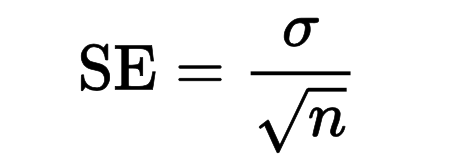

In [33]:
se = sd(medv)/sqrt(dim(Boston)[1])
se

[1] 0.4088611

## (c) Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (b)?

In [34]:
boot.fn = function(data,index){
    mu.hat = mean(data[index])
}
boot.out=boot(medv,boot.fn,1000)
boot.out



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 22.53281 0.01480375    0.399345

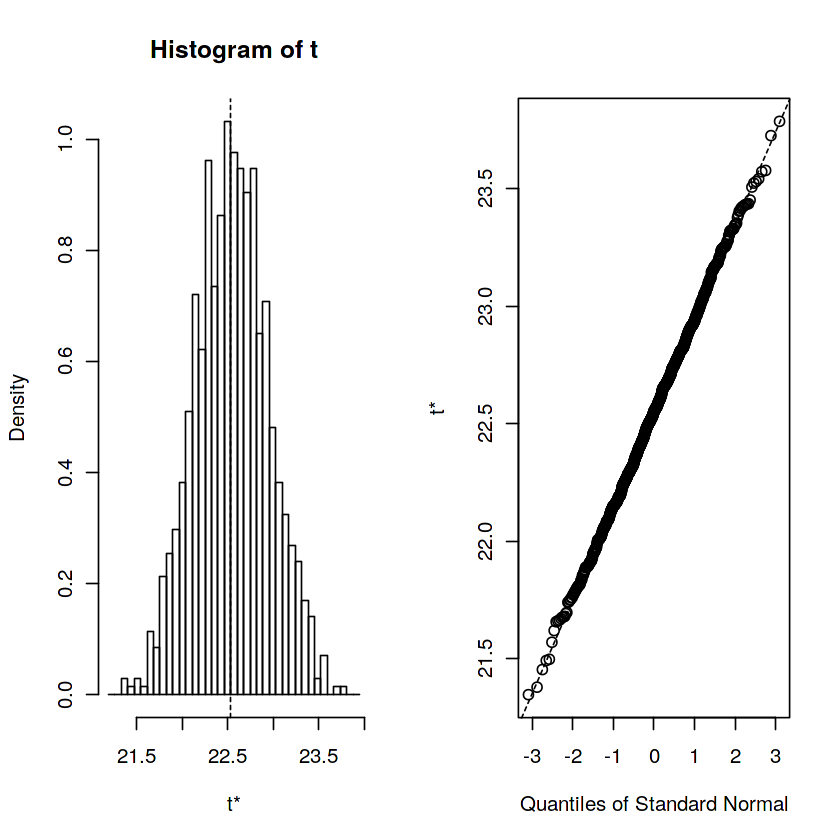

In [35]:
plot(boot.out)

## bootstrap estimations are close 

## (d) Based on your bootstrap estimate from (c), provide a 95 % con- fidence interval for the mean of medv. Compare it to the results obtained using t.test(Boston$medv).
Hint: You can approximate a 95 % confidence interval using the formula [μˆ − 2SE(μˆ), μˆ + 2SE(μˆ)].

In [36]:
t.test(medv)


	One Sample t-test

data:  medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


In [37]:
# confidence intervals for the statistics
boot.ci(boot.out)

Warning message in boot.ci(boot.out):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot.out)

Intervals : 
Level      Normal              Basic         
95%   (21.74, 23.30 )   (21.74, 23.28 )  

Level     Percentile            BCa          
95%   (21.78, 23.33 )   (21.77, 23.33 )  
Calculations and Intervals on Original Scale

## (e) Based on this data set, provide an estimate, μˆmed, for the median value of medv in the population.

In [38]:
med.hat = median(medv)
med.hat

[1] 21.2

## (f) Wenowwouldliketoestimatethestandarderrorofμˆmed.Unfor- tunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [40]:
boot.fn = function(data,index){
    mu.hat = median(data[index])
}
boot.out=boot(medv,boot.fn,1000)
boot.out


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 -0.0248   0.3908359

## (g) Based on this data set, provide an estimate for the tenth per- centile of medv in Boston suburbs. Call this quantity μˆ0.1. (You can use the quantile() function.)

In [41]:
percentile.hat = quantile(medv,c(0.1))
percentile.hat

10% 
12.75

In [43]:
boot.fn = function(data,index){
    mu.hat = quantile(data[index],c(0.1))
}
boot.out=boot(medv,boot.fn,1000)
boot.out


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75 0.00235    0.500042